## Observations and Insights 

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how='outer', on= 'Mouse ID')

# Display the data table for preview
combined.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
mouse_metadata.head()
mouse_metadata['Mouse ID'].value_counts()

l733    1
v835    1
r107    1
w167    1
e213    1
       ..
v766    1
g316    1
c895    1
g989    1
s619    1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
study_results.head()
study_results['Mouse ID'].value_counts()

g989    13
l509    10
a520    10
o562    10
g316    10
        ..
o848     1
b447     1
v199     1
n482     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Checking the number of mice.
combined['Mouse ID'].value_counts()
#mouse_count = combined['Mouse ID'].nunique()

#mouse_count

g989    13
l733    10
a699    10
j365    10
z578    10
        ..
o848     1
x336     1
t573     1
n482     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Select duplicate rows except last occurrence based on all columns
###duplicateRowsDF = combined[
duplicateRowsDF = combined[combined.duplicated(keep = 'last')]

#duplicateRowsDF
print(duplicateRowsDF['Mouse ID'])



908    g989
Name: Mouse ID, dtype: object


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicateRowsDF

#df_withduplicates = combined.groupby(by=['Mouse ID'], dropna= False).count()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


####get row index
duplicateRowsDF.index

clean_combineddf =  combined.drop(labels=None, axis=0, index=duplicateRowsDF.index, columns=None, level=None, inplace=False, errors='raise')
clean_combineddf


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1892 rows x 8 columns]

In [8]:
# Checking the number of mice in the clean DataFrame.

clean_combineddf['Mouse ID'].value_counts()
cleanmouse_count = clean_combineddf['Mouse ID'].nunique()
cleanmouse_count

249

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


##Regimen
clean_combineddf['Drug Regimen'].value_counts()
unique_regimens = clean_combineddf['Drug Regimen'].unique().tolist()
unique_regimens = pd.DataFrame(unique_regimens,columns=['Drug Regimen'])
unique_regimens

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

##Ramicane

#ramicance_df=
 
#quartiles = clean_combineddf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#lowerq

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumorVol = clean_combineddf.groupby(['Drug Regimen'], as_index=True).mean()
mean_df=pd.DataFrame(mean_tumorVol['Tumor Volume (mm3)'])
mean_df=mean_df.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume - Mean'})


median_tumorVol = clean_combineddf.groupby(['Drug Regimen']).median()
median_df = pd.DataFrame(median_tumorVol['Tumor Volume (mm3)'])
median_df = median_df.rename(columns={'Tumor Volume (mm3)' : 'Tumor Volume - Median'})


variance_tumorVol = clean_combineddf.groupby(['Drug Regimen']).var(ddof=1)
var_df = pd.DataFrame(variance_tumorVol['Tumor Volume (mm3)'])
var_df = var_df.rename(columns = {'Tumor Volume (mm3)' : 'Tumor Volume - Variance'})

stdev_tumorVol = clean_combineddf.groupby(['Drug Regimen']).std(ddof=1)
stddev_df = pd.DataFrame(stdev_tumorVol['Tumor Volume (mm3)'])
stddev_df = stddev_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume - Std Dev'})

sem_tumorVol = clean_combineddf.groupby(['Drug Regimen']).sem()
sem_df = pd.DataFrame(sem_tumorVol['Tumor Volume (mm3)'])
sem_df = sem_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume - SEM'})


# Assemble the resulting series into a single summary dataframe.

###append Mean

tumorVol_summarydf = mean_df

###append Median

tumorVol_summarydf['Tumor Volume - Median'] = median_df['Tumor Volume - Median']

###append Variance

tumorVol_summarydf['Tumor Volume - Variance'] = var_df['Tumor Volume - Variance']

###append Standard Deviation

tumorVol_summarydf['Tumor Volume - Std Dev'] = stddev_df['Tumor Volume - Std Dev']

###append SEM

tumorVol_summarydf['Tumor Volume - SEM'] = sem_df['Tumor Volume - SEM']

tumorVol_summarydf



Tumor Volume - Mean  Tumor Volume - Median  \
Drug Regimen                                               
Capomulin               40.675741              41.557809   
Ceftamin                52.591172              51.776157   
Infubinol               52.884795              51.820584   
Ketapril                55.235638              53.698743   
Naftisol                54.331565              52.509285   
Placebo                 54.033581              52.288934   
Propriva                52.368318              50.909965   
Ramicane                40.216745              40.673236   
Stelasyn                54.233149              52.431737   
Zoniferol               53.236507              51.818479   

              Tumor Volume - Variance  Tumor Volume - Std Dev  \
Drug Regimen                                                    
Capomulin                   24.947764                4.994774   
Ceftamin                    39.290177                6.268188   
Infubinol                   43.128684                6.567243   
Ketapril                    68.553577                8.279709   
Naftisol                    66.173479                8.134708   
Placebo                     61.168083                7.821003   
Propriva                    42.278090                6.502160   
Ramicane                    23.486704                4.846308   
Stelasyn                    59.450562                7.710419   
Zoniferol                   48.533355                6.966589   

              Tumor Volume - SEM  
Drug Regimen                      
Capomulin               0.329346  
Ceftamin                0.469821  
Infubinol               0.492236  
Ketapril                0.603860  
Naftisol                0.596466  
Placebo                 0.581331  
Propriva                0.514041  
Ramicane                0.320955  
Stelasyn                0.573111  
Zoniferol               0.516398

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


agg_tumorVol_summarydf = clean_combineddf.groupby(['Drug Regimen']).agg(mean = pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
    median = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "median"),
    variance = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "var"),
    stddev = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "std"),
    SEM = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc = "sem"))
agg_tumorVol_summarydf

mean     median   variance    stddev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

In [ ]:
quartiles = clean_combineddf['Drug Regimen'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_tumorVol = clean_combineddf.loc[(clean_combineddf['Drug Regimen'] < lower_bound) | (clean_combineddf['Drug Regimen'] > upper_bound)]
outlier_tumorVol

## Bar and Pie Charts

In [98]:
mouse_count = clean_combineddf['Drug Regimen'].nunique()

mouse_count


unique_df = clean_combineddf.groupby(by='Drug Regimen', as_index=False).agg({'Mouse ID': pd.Series.nunique})
unique_df = unique_df.rename(columns={'Mouse ID': 'Mouse ID - Unique Count'})

unique_df

Drug Regimen  Mouse ID - Unique Count
0    Capomulin                       25
1     Ceftamin                       25
2    Infubinol                       25
3     Ketapril                       25
4     Naftisol                       25
5      Placebo                       25
6     Propriva                       25
7     Ramicane                       25
8     Stelasyn                       24
9    Zoniferol                       25

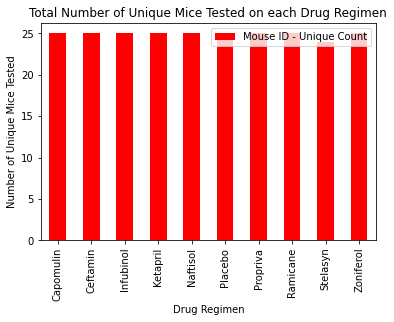

<Figure size 432x288 with 0 Axes>

In [109]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Get mice data
#mice_data=clean_combineddf['Drug Regimen'].value_counts()
mice_data = clean_combineddf.groupby(by='Drug Regimen', as_index=True).agg({'Mouse ID': pd.Series.nunique})
mice_data = mice_data.rename(columns={'Mouse ID': 'Mouse ID - Unique Count'})
mice_data

#Configure plot and ticks
mice_data.plot(kind="bar", facecolor="red")


# Set textual properties
plt.title("Total Number of Unique Mice Tested on each Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()

# Resize plot to display labels
plt.tight_layout()



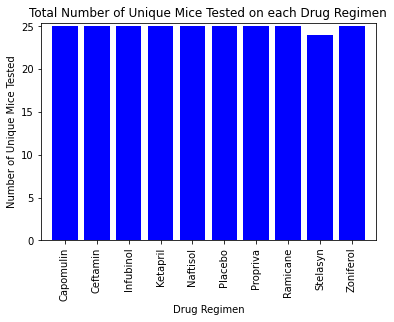

In [124]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

unique_mice_tested = mice_data["Mouse ID - Unique Count"]

regimens = unique_df["Drug Regimen"]
regimens

x_axis = np.arange(len(unique_mice_tested ))

# Create a bar chart based upon the above data
plt.bar(x_axis, unique_mice_tested, color="b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimens, rotation = 90)

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(unique_mice_tested)+0.4)

# Give the chart a title, x label, and y label
plt.title("Total Number of Unique Mice Tested on each Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()

# Resize plot to display labels
#plt.tight_layout()



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
